# Bitcoin price evolution

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/data

Using `bitcoin_cash_price.csv`

In [128]:
%%bash
ls -lh

total 132K
-rw-r--r-- 1 root root 119K Jan 15 01:08 TimeSeries.ipynb
-rw-rw-r-- 1 1000 1000 7.8K Jan 15 00:22 bitcoin_cash_price.csv


In [129]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

In [130]:
df = pd.read_csv('bitcoin_cash_price.csv', parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
Date          108 non-null datetime64[ns]
Open          108 non-null float64
High          108 non-null float64
Low           108 non-null float64
Close         108 non-null float64
Volume        108 non-null object
Market Cap    108 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 6.0+ KB


In [131]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-11-07,602.68,626.21,602.45,616.30,"375,367,000","10,105,200,000"
1,2017-11-06,630.31,657.34,602.65,602.65,"794,105,000","10,566,600,000"
2,2017-11-05,619.91,635.72,579.13,630.70,"816,028,000","10,390,900,000"


In [132]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [133]:
# df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
# df['Market Cap'] = df['Market Cap'].apply(\
#             lambda x: pd.to_numeric(x.replace(',','')))

# # , errors='coerce')

# df.head(3)

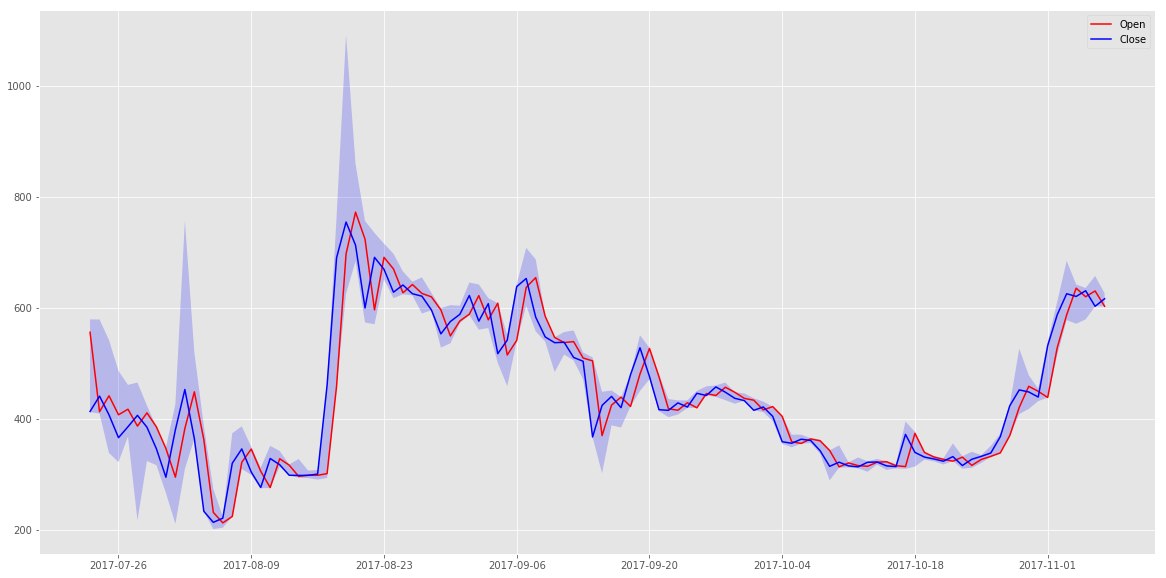

In [134]:
plt.figure(figsize=(20,10))

# df.boxplot()
df.index = df['Date']

plt.plot(df.index, df['Open'], c='r')
plt.plot(df.index, df['Close'], c='b')

plt.fill_between(df.index, df['Low'], df['High'], facecolor='blue', alpha=.2)
#plt.fill_between(df.index, 0, df['Low'], alpha=.8)

plt.legend()

plt.show()

In [135]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


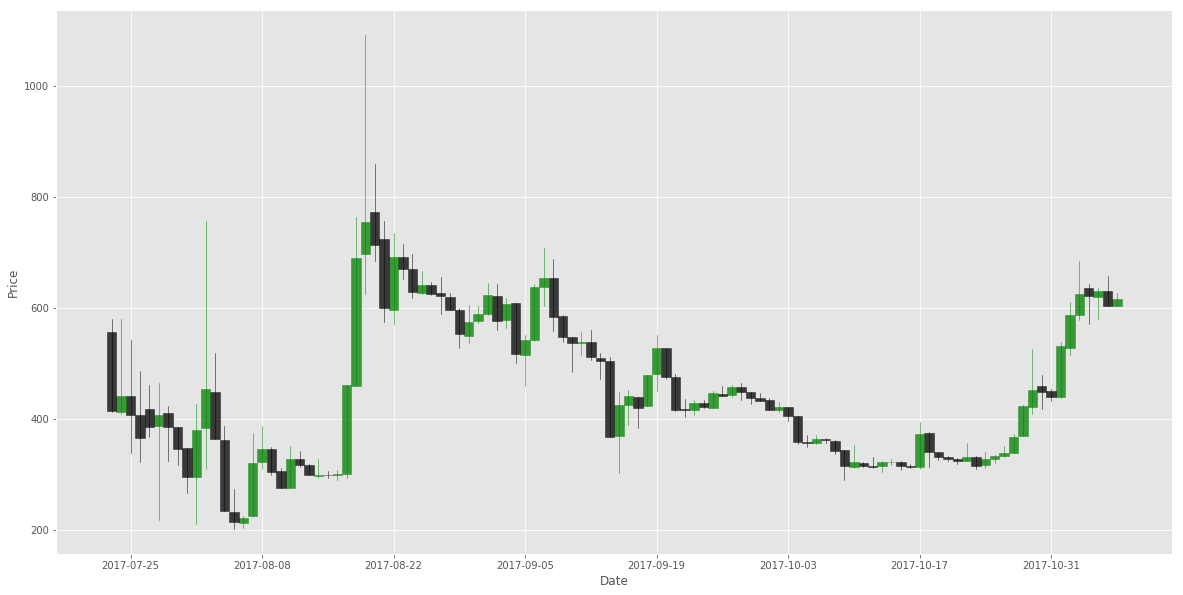

In [139]:
# https://stackoverflow.com/questions/42437349/candlestick-plot-from-a-pandas-dataframe

def candlestick(df):
    df_ohlc = df

    #Converting dates column to float values
    #df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

    #Making plot
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=6, colspan=1)

    #Converts raw mdate numbers to dates
    ax1.xaxis_date()
    plt.xlabel('Date')
    #print(df_ohlc)

    #Making candlestick plot
    candlestick_ohlc(ax1,df_ohlc.values,width=1, colorup='g', colordown='k',alpha=0.75)
    plt.ylabel('Price')
    plt.legend()

    plt.show()

candlestick(df)

In [159]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import numpy as np

In [189]:
x_train, x_test, y_train, y_test = train_test_split(\
    np.array(df.index).reshape(-1,1), df['Close'], test_size=0.33, random_state=42)

y_train = y_train.values
y_test = y_test.values


for item in ['x_train', 'x_test', 'y_train', 'y_test']:
    print('%s: %s' % (item, eval(item).shape))
    print('%s: %s:'% (item, type(eval(item))))
    print('%s: %s:'% (item, eval(item)[:5]))

x_train: (72, 1)
x_train: <class 'numpy.ndarray'>:
x_train: [['2017-10-10T00:00:00.000000000']
 ['2017-09-28T00:00:00.000000000']
 ['2017-11-02T00:00:00.000000000']
 ['2017-09-15T00:00:00.000000000']
 ['2017-07-23T00:00:00.000000000']]:
x_test: (36, 1)
x_test: <class 'numpy.ndarray'>:
x_test: [['2017-08-22T00:00:00.000000000']
 ['2017-10-28T00:00:00.000000000']
 ['2017-11-03T00:00:00.000000000']
 ['2017-08-16T00:00:00.000000000']
 ['2017-09-06T00:00:00.000000000']]:
y_train: (72,)
y_train: <class 'numpy.ndarray'>:
y_train: [ 321.59  447.81  587.22  424.02  413.06]:
y_test: (36,)
y_test: <class 'numpy.ndarray'>:
y_test: [ 690.88  423.35  625.32  300.21  638.18]:


In [190]:
model = linear_model.LinearRegression() # normalize=True

In [191]:
# model.fit(np.array(df.index).reshape(-1,1), df['Close'])
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
#_pred_ma.append(x_test.mean())
#y_true.append(y_test)


TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'

In [ ]:
plt.figure(figsize=(20,10))

# df.boxplot()
df.index = df['Date']

plt.plot(df.index, df['Open'], c='r')
plt.plot(df.index, y_pred, c='b')

plt.fill_between(df.index, df['Low'], df['High'], facecolor='blue', alpha=.2)
#plt.fill_between(df.index, 0, df['Low'], alpha=.8)

plt.legend()

plt.show()